## Aqui colocamos os imports

In [70]:
import pandas as pd
import gensim
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [71]:
data = pd.read_csv("avaliText.csv")

data

,avaliacao,twet,class_label
0,neutral,what said.,0
1,positive,plus you've added commercials to the experien...,1
2,neutral,i didn't today... must mean i need to take an...,0
3,negative,"it's really aggressive to blast obnoxious ""en...",-1
4,negative,and it's a really big bad thing about it,-1
...,...,...,...
14635,positive,thank you we got on a different flight to chi...,1
14636,negative,leaving over 20 minutes late flight. no warni...,-1
14637,neutral,please bring american airlines to,0
14638,negative,"you have my money, you change my flight, and ...",-1


In [72]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))

documents = []
for index, row in data.iterrows():
    documents.append(read_questions(row,"twet"))

In [73]:
documents

[['what', 'said'],
 ['plus',
  'you',
  've',
  'added',
  'commercials',
  'to',
  'the',
  'experience',
  'tacky'],
 ['didn', 'today', 'must', 'mean', 'need', 'to', 'take', 'another', 'trip'],
 ['it',
  'really',
  'aggressive',
  'to',
  'blast',
  'obnoxious',
  'entertainment',
  'in',
  'your',
  'guests',
  'faces',
  'amp',
  'they',
  'have',
  'little',
  'recourse'],
 ['and', 'it', 'really', 'big', 'bad', 'thing', 'about', 'it'],
 ['seriously',
  'would',
  'pay',
  'flight',
  'for',
  'seats',
  'that',
  'didn',
  'have',
  'this',
  'playing',
  'it',
  'really',
  'the',
  'only',
  'bad',
  'thing',
  'about',
  'flying',
  'va'],
 ['yes',
  'nearly',
  'every',
  'time',
  'fly',
  'vx',
  'this',
  'ear',
  'worm',
  'won',
  'go',
  'away'],
 ['really',
  'missed',
  'prime',
  'opportunity',
  'for',
  'men',
  'without',
  'hats',
  'parody',
  'there'],
 ['well', 'didn', 'but', 'now', 'do'],
 ['it',
  'was',
  'amazing',
  'and',
  'arrived',
  'an',
  'hour',
 

In [74]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)

model.build_vocab(documents)

In [75]:
model.train(sentences=documents,total_examples=len(documents),epochs=model.iter)

/home/matheus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(825109, 1102005)

In [76]:
model.wv.vocab

{'what': <gensim.models.keyedvectors.Vocab at 0x7fe97457be50>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7fe943bb8f50>,
 'plus': <gensim.models.keyedvectors.Vocab at 0x7fe95cea0710>,
 'you': <gensim.models.keyedvectors.Vocab at 0x7fe95cea0f10>,
 've': <gensim.models.keyedvectors.Vocab at 0x7fe95cf39bd0>,
 'added': <gensim.models.keyedvectors.Vocab at 0x7fe974653b10>,
 'commercials': <gensim.models.keyedvectors.Vocab at 0x7fe974653a10>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fe974653b90>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fe95cea0650>,
 'experience': <gensim.models.keyedvectors.Vocab at 0x7fe974886d50>,
 'didn': <gensim.models.keyedvectors.Vocab at 0x7fe974653f50>,
 'today': <gensim.models.keyedvectors.Vocab at 0x7fe974653650>,
 'must': <gensim.models.keyedvectors.Vocab at 0x7fe974653850>,
 'mean': <gensim.models.keyedvectors.Vocab at 0x7fe974653890>,
 'need': <gensim.models.keyedvectors.Vocab at 0x7fe9746539d0>,
 'take': <gensim.models.keyedvectors.Vocab at 

In [77]:
model.wv['said']

array([-1.75859645e-01, -6.63418323e-02,  2.23923013e-01,  2.02444233e-02,
        1.16052933e-01, -6.80931509e-02, -1.63853809e-01,  6.27927721e-01,
        7.86911398e-02,  4.91494797e-02,  1.47947252e-01, -2.60456074e-02,
        1.64938867e-02,  1.34879410e-01, -1.18175358e-01,  1.64012790e-01,
        9.41834599e-02,  2.82117754e-01, -2.85981774e-01,  1.46575779e-01,
       -3.05245459e-01, -2.55441278e-01,  3.46743427e-02, -2.97498137e-01,
        1.02649592e-01, -1.21345483e-01,  3.58548194e-01,  5.27706817e-02,
        1.08801574e-01,  3.71028222e-02, -1.98097870e-04, -1.89347982e-01,
        6.59331540e-03,  1.81127395e-02, -1.73971072e-01,  2.71352559e-01,
        6.51397854e-02, -2.33259916e-01, -7.88881257e-02, -2.14413151e-01,
       -1.13213388e-02, -5.43712564e-02,  1.47541419e-01, -6.96705952e-02,
        2.84457535e-01, -3.75204831e-02,  3.22471470e-01,  7.51067847e-02,
        1.74206302e-01,  2.90192664e-01,  4.60572876e-02, -6.87838271e-02,
       -4.89128567e-02,  

In [78]:
model.wv['said']

array([-1.75859645e-01, -6.63418323e-02,  2.23923013e-01,  2.02444233e-02,
        1.16052933e-01, -6.80931509e-02, -1.63853809e-01,  6.27927721e-01,
        7.86911398e-02,  4.91494797e-02,  1.47947252e-01, -2.60456074e-02,
        1.64938867e-02,  1.34879410e-01, -1.18175358e-01,  1.64012790e-01,
        9.41834599e-02,  2.82117754e-01, -2.85981774e-01,  1.46575779e-01,
       -3.05245459e-01, -2.55441278e-01,  3.46743427e-02, -2.97498137e-01,
        1.02649592e-01, -1.21345483e-01,  3.58548194e-01,  5.27706817e-02,
        1.08801574e-01,  3.71028222e-02, -1.98097870e-04, -1.89347982e-01,
        6.59331540e-03,  1.81127395e-02, -1.73971072e-01,  2.71352559e-01,
        6.51397854e-02, -2.33259916e-01, -7.88881257e-02, -2.14413151e-01,
       -1.13213388e-02, -5.43712564e-02,  1.47541419e-01, -6.96705952e-02,
        2.84457535e-01, -3.75204831e-02,  3.22471470e-01,  7.51067847e-02,
        1.74206302e-01,  2.90192664e-01,  4.60572876e-02, -6.87838271e-02,
       -4.89128567e-02,  

### Criando uma representação 2d dos dados com compressão de coordenadas.

In [79]:
dici = model.wv.vocab.keys()

dici = list(dici)

dici = dici[0:100]

dici

#dici = {pal : model.wv.vocab[pal] for pal in dici}



['what',
 'said',
 'plus',
 'you',
 've',
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 'didn',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'it',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'in',
 'your',
 'guests',
 'faces',
 'amp',
 'they',
 'have',
 'little',
 'recourse',
 'and',
 'big',
 'bad',
 'thing',
 'about',
 'seriously',
 'would',
 'pay',
 'flight',
 'for',
 'seats',
 'that',
 'this',
 'playing',
 'only',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'won',
 'go',
 'away',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hats',
 'there',
 'well',
 'but',
 'now',
 'do',
 'was',
 'amazing',
 'arrived',
 'an',
 'hour',
 'early',
 're',
 'too',
 'good',
 'me',
 'did',
 'know',
 'suicide',
 'is',
 'second',
 'leading',
 'cause',
 'of',
 'death',
 'among',
 'teens',
 'lt',
 'pretty',
 'so',
 'much',
 'better',
 'than',
 'such',
 'great']

In [85]:
X = model[dici]

/home/matheus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [84]:
tsne_model = TSNE(perplexity=40,n_components=2,init="pca", n_iter=5000, random_state=23)

Y = tsne_model.fit_transform(X)

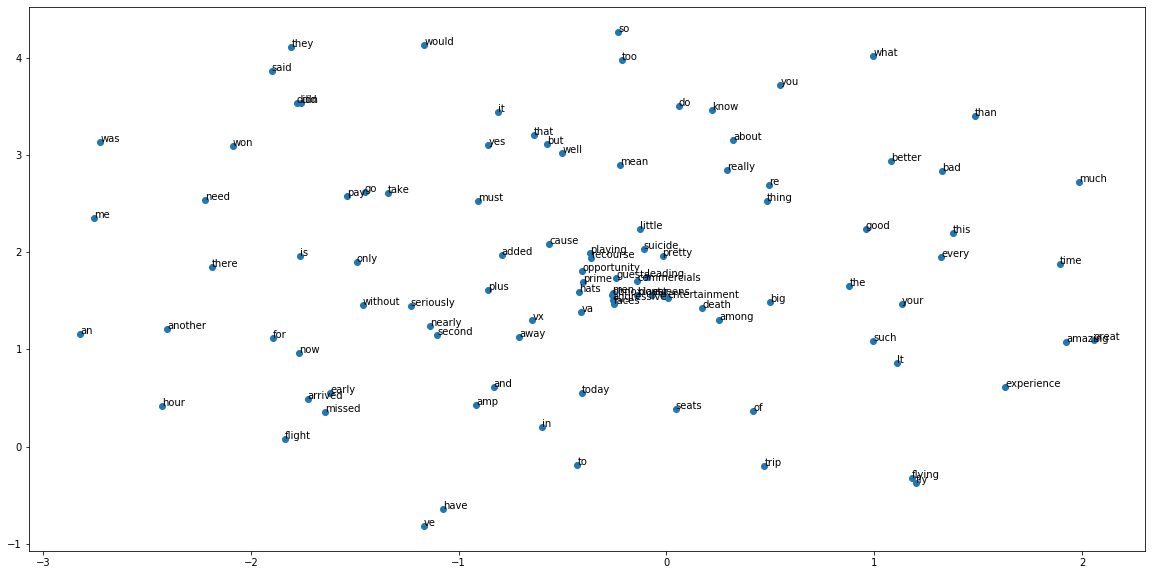

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])

for i,word in enumerate(dici):
    plt.annotate(word,xy=(Y[i,0],Y[i,1]))